In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [2]:
from utils import *
from data import *
from layers import *
from models import *

In [3]:
import pickle as p
import io 

In [4]:
limit_gpus()
set_gpu(3)

In [5]:
dataset = "mnist"
n_batch = 256

ds_train, ds_test, ds_info = load_dataset(dataset)

input_shape = ds_info.features['image'].shape
num_classes = ds_info.features['label'].num_classes


In [6]:
ds_test = ds_test.batch(n_batch)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
head = keras.models.load_model("ae_conv_head.h5")
head.compile()

inv_head = keras.models.load_model("ae_inv_head.h5")
inv_head.compile()

In [8]:
n_d = 1000
n_hidden = 100

image_input = keras.Input(shape=input_shape)
class_input = keras.Input(shape=(n_d,))

In [9]:
dat_x, dat_y = get_raw_dat(ds_train.batch(128))

In [10]:
cdp = class_data_pairs(dat_x,dat_y)

12665
12089
11263
12183
11800


In [11]:
def conf_acc(model):
    conf = incm.accuracy(ds_test, True)[0]
    acc = confusion_to_acc(conf)
    print(acc)
    plt.pcolor(conf)

In [12]:
plotconf = lambda: conf_acc(incm)

In [13]:
incm = IrisModel(head, inv_head, ds_info, n_d=n_d, n_hidden=n_hidden, sigma=3.0, overscan=100)
incm.compile(optimizer="rmsprop")

# train on first dataset

In [14]:
ext1 = incm.generate_external(cdp[0].batch(128), True)

In [15]:
loss = incm.train(ext1,1)

Training loss [0.98391473 1.0139409  0.99658984 0.9927112 ]


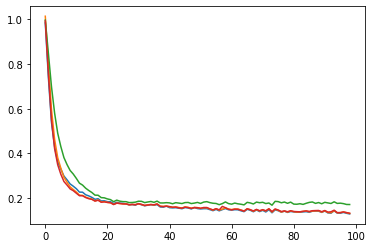

In [16]:
plt.plot(loss)

0.2114


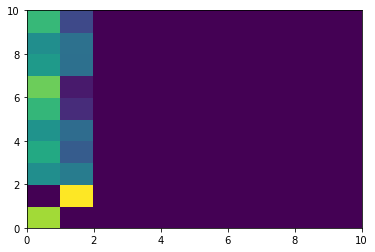

In [17]:
plotconf()

# Train on second set

In [18]:
ext2 = incm.generate_external(cdp[1].batch(128), True)

In [19]:
d2 = interleave_symbols(ext2, ext1)

In [20]:
loss = incm.train(d2,1)

Training loss [0.30621207 0.32388812 0.5705502  0.32208785]
Training loss [0.17095533 0.1621652  0.1977478  0.16290557]


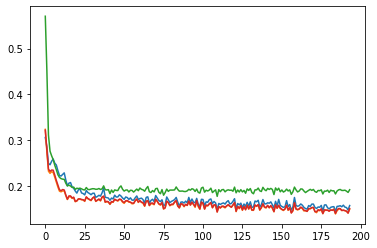

In [21]:
plt.plot(loss)

In [22]:
loss = incm.train(d2,1)

Training loss [0.15959448 0.15328552 0.19866395 0.15348828]
Training loss [0.15243582 0.14371064 0.19710547 0.14369196]


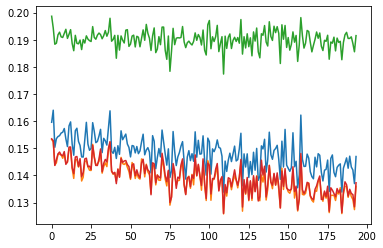

In [23]:
plt.plot(loss)

0.4144


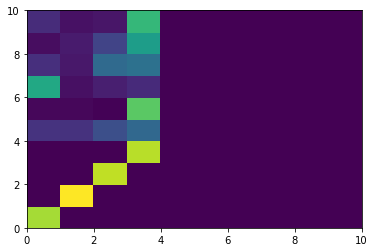

In [24]:
plotconf()

# Train on third set

In [25]:
ext3 = incm.generate_external(cdp[2].batch(128), True)

In [26]:
d3 = interleave_symbols(ext3, d2)

In [27]:
loss = incm.train(d3,1)

Training loss [0.2638992  0.2526353  0.4758036  0.25755376]
Training loss [0.16154414 0.14843102 0.19097356 0.14863743]
Training loss [0.15613744 0.14115484 0.1925568  0.14204034]


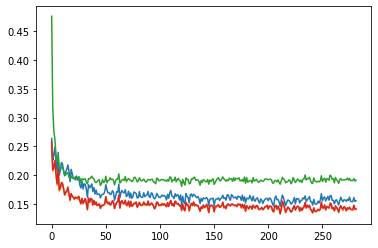

In [28]:
plt.plot(loss)

0.6001


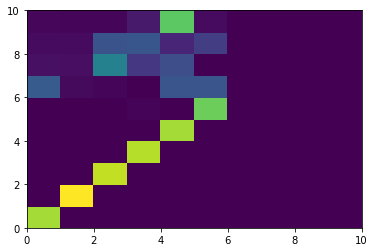

In [29]:
plotconf()

# Train on fourth set

In [30]:
ext4 = incm.generate_external(cdp[3].batch(128), True)

In [31]:
d4 = interleave_symbols(ext4, d3)

In [32]:
loss = incm.train(d4,1)

Training loss [0.22505888 0.2129431  0.40322787 0.2148228 ]
Training loss [0.16446884 0.14363661 0.18336123 0.14512508]
Training loss [0.16442992 0.1466135  0.18981737 0.14862193]
Training loss [0.15920922 0.14533785 0.19547683 0.14603418]


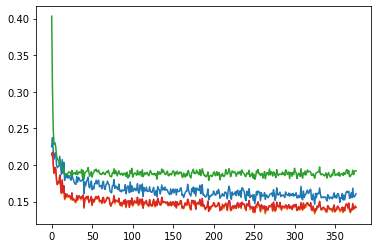

In [33]:
plt.plot(loss)

0.7922


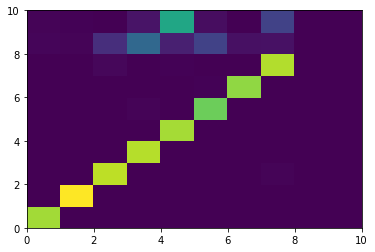

In [34]:
plotconf()

# Train on fifth & last pair

In [35]:
ext5 = incm.generate_external(cdp[4].batch(128), True)

In [36]:
d5 = interleave_symbols(ext5, d4)

In [37]:
loss = incm.train(d5,1)

Training loss [0.21678013 0.20039837 0.3033089  0.20080322]
Training loss [0.17630242 0.14934456 0.1889367  0.15097415]
Training loss [0.16972367 0.14803952 0.19041258 0.14912677]
Training loss [0.16487846 0.14374045 0.18730935 0.14493234]
Training loss [0.1607451  0.14075947 0.18580605 0.14168717]


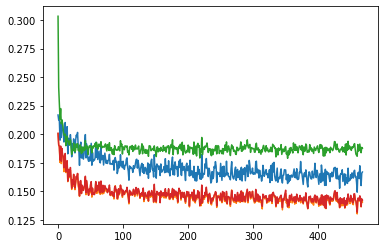

In [38]:
plt.plot(loss)

0.9824


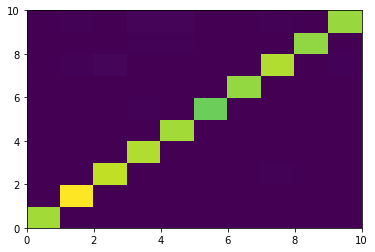

In [39]:
plotconf()